### 1. Загрузка данных и первичный осмотр

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("S02-hw-dataset.csv")

In [3]:
data.head() # первые 5 строк датасета

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
data.info() # информация о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
data.describe() # базовые описательные статистики

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


### 2. Пропуски, дубликаты и базовый контроль качества

In [6]:
data.isna().sum() # количество пропусков в каждом столбце

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

In [7]:
data.isna().mean() # доля пропусков в каждом столбце

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [8]:
data[data.duplicated(keep=False) == True] # полностью дублирующие строки

,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


In [9]:
data[data['age'] > 100]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [10]:
data[data['revenue'] == 0]

,user_id,age,country,purchases,revenue
6,7,46.0,RU,0,0
10,11,24.0,US,4,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


Были обнаружены следующие проблемы качества данных:
- Столбец `age` содержит 2 пропуска
- Есть 2 полностью дублирующие строки
- Минимальный возраст - 5 лет, максимальный - 120 лет
- Столбец `purchases` содержит отрицательное значение, равное -1
- Присутствует запись, где при 4 покупках прибыль равна 0

### 3. Базовый EDA: группировки, агрегаты и частоты

In [11]:
data['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [12]:
data[['country', 'purchases', 'revenue']].groupby('country').sum().sort_values('revenue', ascending=False)

,purchases,revenue
country,,
RU,62,10271
DE,39,8673
FR,51,8111
US,37,4459
CN,9,2108


In [13]:
data[['country', 'purchases', 'revenue']].groupby('country').mean().sort_values('revenue', ascending=False)

,purchases,revenue
country,,
DE,6.500000,1445.500000
CN,4.500000,1054.000000
RU,4.769231,790.076923
FR,4.250000,675.916667
US,4.625000,557.375000


По странам доминируют RU и FR, меньше всего записей у CN. По средним значениям `revenue` доминируют DE и CN, по средним значениям `purchases` - DE и RU.

### 4. Визуализация данных в Matplotlib

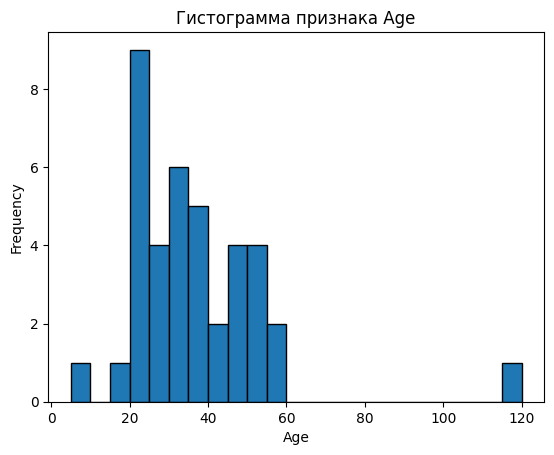

In [14]:
plt.hist(data['age'], bins=23, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Гистограмма признака Age")
plt.savefig("figures/hist.png")
plt.show()

Из графика гистограммы признака `age` видно, что есть явный выброс со значением 120, также выделяется значение 5, которое, возможно, тоже является выбросом. Основная часть `users` - от 20 от 60 лет.

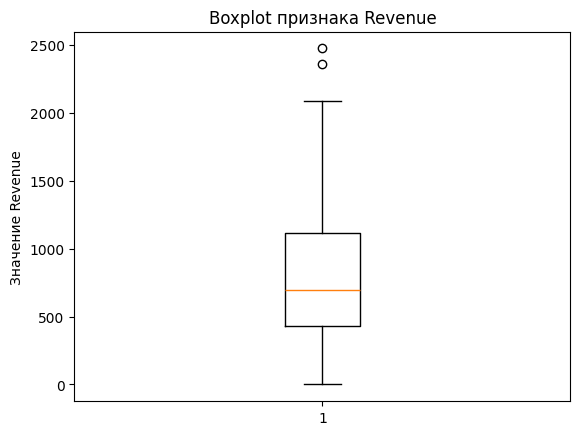

In [15]:
plt.boxplot(data['revenue'])
plt.ylabel("Значение Revenue")
plt.title("Boxplot признака Revenue")
plt.savefig("figures/boxplot.png")
plt.show()

Из графика можно оценить распределение признака `revenue` - минимальное значение, первый квантиль (25-й процентиль), медиану, третий квантиль (75-й процентиль), максимальное значение и два предположительных выброса.

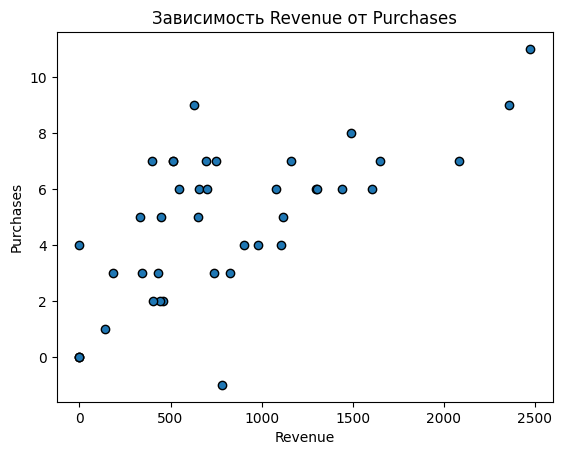

In [16]:
plt.scatter(data['revenue'], data['purchases'], edgecolors="black")
plt.xlabel("Revenue")
plt.ylabel("Purchases")
plt.title("Зависимость Revenue от Purchases")
plt.savefig("figures/scatter.png")
plt.show()

Из графика можно сделать вывод о наличии линейной зависимости между признаками `revenue` и `purchases`.